In [1]:
%cd ~/Downloads/

/home/pysolver33/Downloads


In [2]:
%ll

total 11878716
-rw-r--r-- 1 pysolver33    2793670 Jan 28 18:20  20200716_192149.jpg
-rw-r--r-- 1 pysolver33     302525 Jan 28 17:48  2020___Tony.pdf
-rw-r--r-- 1 pysolver33       2313 Feb  1 17:54  audiolabeler-80433a9fbba4.json
-rw-r--r-- 1 pysolver33     397970 Jan 28 18:01  CS50x.pdf
-rw-r--r-- 1 pysolver33     917757 Jan 20 18:57  DataStructuresNOTES.pdf
drwxr-xr-x 2 pysolver33       4096 Feb  2 14:13  glove.twitter/
-rw-r--r-- 1 pysolver33 1520408563 Feb  1 18:56  glove.twitter.27B.zip
-rw-r--r-- 1 pysolver33   72800524 Feb  1 16:59  google-chrome-stable_current_amd64.deb
-rw-r--r-- 1 pysolver33 3644258522 Feb  3 20:07  GoogleNews-vectors-negative300.bin
drwxr-xr-x 2 pysolver33       4096 Nov 24  2018  multi_cased_L-12_H-768_A-12/
-rw-r--r-- 1 pysolver33  662903077 Feb  1 19:28  multi_cased_L-12_H-768_A-12.zip
-rw-r--r-- 1 pysolver33    1293278 Feb  5 12:29  NTHU_Fall2021_UndergradauteGuideline.pdf
-rw-r--r-- 1 pysolver33       7966 Jan 28 17:50 'ray_reference .doc.docx'
-rw-r--r-

# Objective 
The ultimate goal of this script was to use linear and logistic regression
in order to predict a popularity score, using the attributes listed below
as dependent variables.

All columns in this dataset and a full description of each.
Note these descriptions are from Spotify's API website.
    
## Feature definition
- __acousticness__ (float):   
    - A confidence measure from 0.0 to 1.0 of whether the 
    track is acoustic. 1.0 represents high confidence 
    the track is acoustic.

- __danceability__ (float):   
    - Danceability describes how suitable a track is for 
    dancing based on a combination of musical elements 
    including tempo, rhythm stability, beat strength, 
    and overall regularity. A value of 0.0 is least 
    danceable and 1.0 is most danceable.

- __duration_ms__ (int): 
    - The duration of the track in milliseconds.
- __energy__ (float): 
    - Energy is a measure from 0.0 to 1.0 and represents a 
    perceptual measure of intensity and activity. Typically, 
    energetic tracks feel fast, loud, and noisy. For example, 
    death metal has high energy, while a Bach prelude scores low 
    on the scale. Perceptual features contributing to this 
    attribute include dynamic range, perceived loudness, timbre, 
    onset rate, and general entropy.
- __instrumentalness__ (float): 
    - Predicts whether a track contains no vocals. “Ooh” 
    and “aah” sounds are treated as instrumental in this 
    context. Rap or spoken word tracks are clearly “vocal”. 
    The closer the instrumentalness value is to 1.0, the 
    greater likelihood the track contains no vocal content. 
    Values above 0.5 are intended to represent instrumental 
    tracks, but confidence is higher as the value approaches 
    1.0.
- __key__ (int): 
    - The estimated overall key of the track. Integers map to pitches using 
   stanbeats perdard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 
   If no key was detected, the value is -1.
- __liveness__ (float): 
    - Detects the presence of an audience in the recording. 
    Higher liveness values represent an increased probability that the 
    track was performed live. A value above 0.8 provides strong likelihood 
    that the track is live.
- __loudness__ (float): 
    - The overall loudness of a track in decibels (dB). 
    Loudness values are averaged across the entire track and are useful for comparing 
    relative loudness of tracks. Loudness is the quality of a sound that is the primary 
    psychological correlate of physical strength (amplitude). Values typical range between 
    -60 and 0 db.
- __mode__( int): 
    - Mode indicates the modality (major or minor) of a track, the type of scale 
    from which its melodic content is derived. Major is represented by 1 and minor is 0.
- __speechiness__ (float): 
    - Speechiness detects the presence of spoken words in a track. 
    The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), 
    the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably 
    made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain 
    both music and speech, either in sections or layered, including such cases as rap music. 
    Values below 0.33 most likely represent music and other non-speech-like tracks. 
- __tempo__: 
    - beats per minute
- __valence__ (float): 
    - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by 
    a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks 
    with low valence sound more negative (e.g. sad, depressed, angry).
    popularity - overall popularity score (based on # of clicks) The popularity of the track. The value 
    will be between 0 and 100, with 100 being the most popular.
- time_signature:
    - year

The popularity of a track is a value between 0 and 100, with 100 being the most popular. 
The popularity is calculated by algorithm and is based, in the most part, on the total number of plays 
the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that 
were played a lot in the past.

## Hypothesis
- look at all the normalized data, find correlation, and map/weight normalized data to regression model
- recency bias has large relevance to popularity score


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load in main database of songs and attributes
def load_data():
    df = pd.read_csv('/home/pysolver33/Downloads/Spotify Song Data (Full).csv')
    df.artists = df.artists.str.replace("[","")
    df.artists = df.artists.str.replace("]","")
    df.artists = df.artists.str.replace("'","")
    df.rename(columns={'artists':'artist_name','id':'track_id','name':'track_name','year':'time_signature'},inplace=True)
    return df
# load data
df = load_data()
  

## Understanding basic values and elements of given data set

In [5]:
df.head()


,track_id,artist_name,track_name,time_signature,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
0,4BJqT0PrAfrxzMOxytFOIz,"Sergei Rachmaninoff, James Levine, Berliner Ph...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921,0.0594,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,0.0366,80.954,4
1,7xPhfUan2yNtyFG0cUWkt8,Dennis Day,Clancy Lowered the Boom,1921,0.9630,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,0.4150,60.936,5
2,1o6I8BglA6ylDMrIELygv1,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Bali,1921,0.0394,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,0.0339,110.339,5
3,3ftBPsC5vPBKxYSee08FDH,Frank Parker,Danny Boy,1921,0.1650,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,0.0354,100.109,3
4,4d6HGyGT8e121BsdKmw9v6,Phil Regan,When Irish Eyes Are Smiling,1921,0.2530,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,0.0380,101.665,2


Take an initial look at our data


In [6]:
print("The columns are:")
df.columns

The columns are:


Index(['track_id', 'artist_name', 'track_name', 'time_signature', 'valence',
       'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'popularity'],
      dtype='object')

Take a look at the columns in our data set


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          170653 non-null  object 
 1   artist_name       170653 non-null  object 
 2   track_name        170653 non-null  object 
 3   time_signature    170653 non-null  int64  
 4   valence           170653 non-null  float64
 5   acousticness      170653 non-null  float64
 6   danceability      170653 non-null  float64
 7   duration_ms       170653 non-null  int64  
 8   energy            170653 non-null  float64
 9   explicit          170653 non-null  int64  
 10  instrumentalness  170653 non-null  float64
 11  key               170653 non-null  int64  
 12  liveness          170653 non-null  float64
 13  loudness          170653 non-null  float64
 14  mode              170653 non-null  int64  
 15  speechiness       170653 non-null  float64
 16  tempo             17

look at data types for each

In [8]:
print("Do we have any nulls?")
print(f"Looks like we have {df.isnull().sum().sum()} nulls")

Do we have any nulls?
Looks like we have 0 nulls


Take a look at data types, and it looks like we have a pretty clean data set!


In [9]:
df[df.popularity == 0].head()

,track_id,artist_name,track_name,time_signature,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
8,05xDjWH9ub67nJJk82yfGf,Ignacio Corsini,La Mañanita - Remasterizado,1921,0.721,0.996,0.485,161520,0.130,0,0.151,5,0.104,-21.508,0,0.0483,64.678,0
9,08zfJvRLp7pjAb94MA9JmF,Fortugé,Il Etait Syndiqué,1921,0.771,0.982,0.684,196560,0.257,0,0.000,8,0.504,-16.415,1,0.3990,109.378,0
10,0BMkRpQtDoKjcgzCpnqLNa,Maurice Chevalier,Dans La Vie Faut Pas S'en Faire,1921,0.826,0.995,0.463,147133,0.260,0,0.000,9,0.258,-16.894,1,0.0557,85.146,0
11,0F30WM8qRpO8kdolepZqdM,Ignacio Corsini,Por Que Me Dejaste - Remasterizado,1921,0.578,0.994,0.378,155413,0.115,0,0.906,10,0.110,-27.039,0,0.0414,70.370,0
12,0H3k2CvJvHULnWChlbeFgx,Georgel,La Vipère,1921,0.493,0.990,0.315,190800,0.363,0,0.000,5,0.292,-12.562,0,0.0546,174.532,0


In [10]:
df[df.popularity == 0].shape

(27892, 18)

In [11]:
df[df.popularity == 0].shape[0] / df.shape[0]

0.16344277569102214

However, 16% of data set of  0 popularity scores might throw the model(s) off a bit.

In [12]:
# Lets take a look at the average popularity score
pop_mean = df['popularity'].mean()
pop_mean

31.431794342906365

Lets take a look at the average popularity score

In [13]:
# Proportion of songs that are very popular
df[df['popularity'] >= 50 ]['popularity'].count() / df.shape[0]

0.22719202123607554

Proportion of songs that are very popular

In [14]:
# Unique artists and song counts by artist
df['artist_name'].unique().shape


(34087,)

 Unique artists and song counts by artist

In [15]:
# top 10 artists publications
df['artist_name'].value_counts()[:10]

Эрнест Хемингуэй      1211
Эрих Мария Ремарк     1068
Francisco Canaro       942
Frank Sinatra          630
Ignacio Corsini        628
Elvis Presley          504
Johnny Cash            484
Bob Dylan              474
The Rolling Stones     471
The Beach Boys         455
Name: artist_name, dtype: int64

top 10 artists publications

In [16]:
# last 10 artists publications
df['artist_name'].value_counts()[-11:]

Busta Rhymes, Ozzy Osbourne                               1
Trillville, Lil Jon, Lil Scrappy                          1
Sonny Rollins, Max Roach, Richie Powell, George Morrow    1
Howard Shore, Billy Boyd                                  1
Jaycee Hill                                               1
John Vincent III                                          1
Gunna, NAV, Metro Boomin                                  1
Skylar Spence                                             1
Yngwie Malmsteen, Joe Lynn Turner                         1
Coupé Cloué                                               1
Noël-Noël                                                 1
Name: artist_name, dtype: int64

last 10 artists publications

In [17]:
df.track_id.sort_values()

66784     000G1xMMuwxNHmwVsBdtj1
138440    000GyYHG4uWmlXieKLij8u
61760     000Npgk5e2SgwGaIsN3ztv
111779    000ZxLGm7jDlWCHtcXSeBe
111780    000jBcNljWTnyjB4YO7ojf
                   ...          
107591    7zyqJJ0QwajaHaPLCqZFXN
105542    7zywdG4ysfC5XNBzjQAo2o
62798     7zzbPkvxJ6iANIxcSz60rm
29067     7zzbfi8fvHe6hm342GcNYl
29083     7zzuPsjj9L3M7ikqGmjN0D
Name: track_id, Length: 170653, dtype: object

In [18]:
df[['track_id','artist_name','track_name','time_signature']]

,track_id,artist_name,track_name,time_signature
0,4BJqT0PrAfrxzMOxytFOIz,"Sergei Rachmaninoff, James Levine, Berliner Ph...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",1921
1,7xPhfUan2yNtyFG0cUWkt8,Dennis Day,Clancy Lowered the Boom,1921
2,1o6I8BglA6ylDMrIELygv1,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Bali,1921
3,3ftBPsC5vPBKxYSee08FDH,Frank Parker,Danny Boy,1921
4,4d6HGyGT8e121BsdKmw9v6,Phil Regan,When Irish Eyes Are Smiling,1921
...,...,...,...,...
170648,0KkIkfsLEJbrcIhYsCL7L5,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",China,2020
170649,0OStKKAuXlxA0fMH54Qs6E,Ashnikko,Halloweenie III: Seven Days,2020
170650,4BZXVFYCb76Q0Klojq4piV,MAMAMOO,AYA,2020
170651,5SiZJoLXp3WOl3J4C8IK0d,Eminem,Darkness,2020


rows of columns seems already sorted by year, thus id, artists would in all likelihood be irrelevant to our analysis

In [19]:
cols_interest = [col for idx,col in enumerate(df.columns) if col not in ['track_id','artist_name','track_name']]
df = df[cols_interest]
df.head(10)

,time_signature,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,popularity
0,1921,0.0594,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,0.0366,80.954,4
1,1921,0.9630,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,0.4150,60.936,5
2,1921,0.0394,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,0.0339,110.339,5
3,1921,0.1650,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,0.0354,100.109,3
4,1921,0.2530,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,0.0380,101.665,2
5,1921,0.1960,0.579,0.697,395076,0.346,0,0.168000,2,0.130,-12.506,1,0.0700,119.824,6
6,1921,0.4060,0.996,0.518,159507,0.203,0,0.000000,0,0.115,-10.589,1,0.0615,66.221,4
7,1921,0.0731,0.993,0.389,218773,0.088,0,0.527000,1,0.363,-21.091,0,0.0456,92.867,2
8,1921,0.7210,0.996,0.485,161520,0.130,0,0.151000,5,0.104,-21.508,0,0.0483,64.678,0
9,1921,0.7710,0.982,0.684,196560,0.257,0,0.000000,8,0.504,-16.415,1,0.3990,109.378,0


## Take a look at the data with truncated columns

In [20]:
def describe_cols(df, L=10):
    '''Limit ENTIRE column width (including header)'''
    # get the max col width
    O = pd.get_option("display.max_colwidth")
    # set max col width to be L
    pd.set_option("display.max_colwidth", L)
    pd.set_option("display.max_colwidth", O)
    return L
    
L = describe_cols(df, 9)
df.rename(columns=lambda x: x[:L - 2] + '...' if len(x) > L else x).describe()

,time_si...,valence,acousti...,danceab...,duratio...,energy,explicit,instrum...,key,liveness,loudness,mode,speechi...,tempo,popular...
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,1976.787241,0.528587,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,0.098393,116.861590,31.431794
std,25.917853,0.263171,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,0.162740,30.708533,21.826615
min,1921.000000,0.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,1956.000000,0.317000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,0.034900,93.421000,11.000000
50%,1977.000000,0.540000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,0.045000,114.729000,33.000000
75%,1999.000000,0.747000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,0.075600,135.537000,48.000000
max,2020.000000,1.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.970000,243.507000,100.000000


nice way to truncate the column names to display easier
- can be used with various metrics

## Look at top correlations - look into multicollinearity

In [21]:
# get redundant pairs from DataFrame
def get_redundant_pairs(df):
    '''Get diagonal pairs of correlation matrix and all pairs we'll remove 
    (since pair each is doubled in corr matrix)'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            if df[cols[i]].dtype != 'object' and df[cols[j]].dtype != 'object':
                # print("THIS IS NOT AN OBJECT, YO, so you CAN take a corr of it, smarty!")
                pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    
    print("The top absolute correlations are:")
    return au_corr[0:n]

abs_corr = get_top_abs_correlations(df, 10)
abs_corr

The top absolute correlations are:


time_signature  popularity      0.862442
energy          loudness        0.782362
acousticness    energy          0.749393
time_signature  acousticness    0.614250
acousticness    popularity      0.573162
                loudness        0.561696
valence         danceability    0.558946
time_signature  energy          0.530272
                loudness        0.487697
energy          popularity      0.485005
dtype: float64

## Utilize visualization techniques for better intuition of data

In [22]:
# plot a scatter plot
def scatter_plot(df, col_x, col_y):
    plt.figure(figsize=(8, 8))
    plt.scatter(df[col_x], df[col_y], alpha=0.2)
    plt.title(f"{col_x} respect to {col_y}")
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()

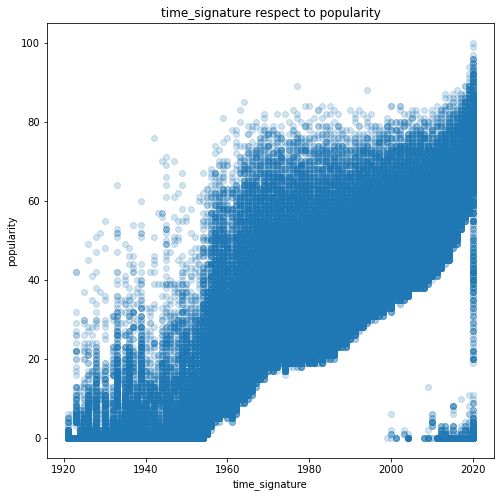

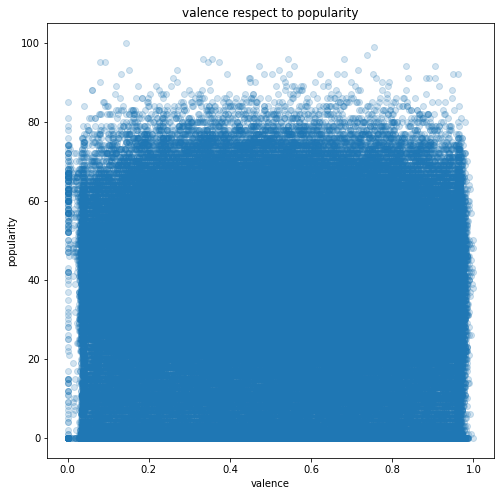

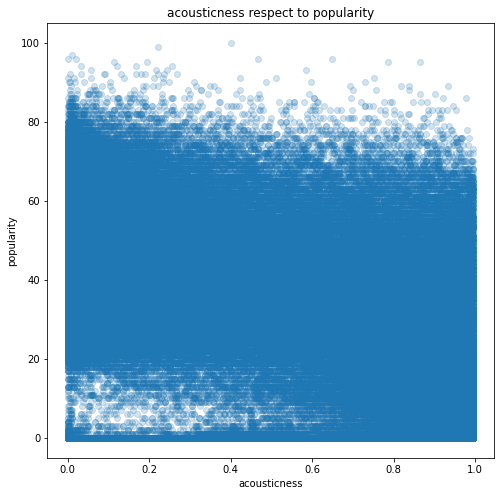

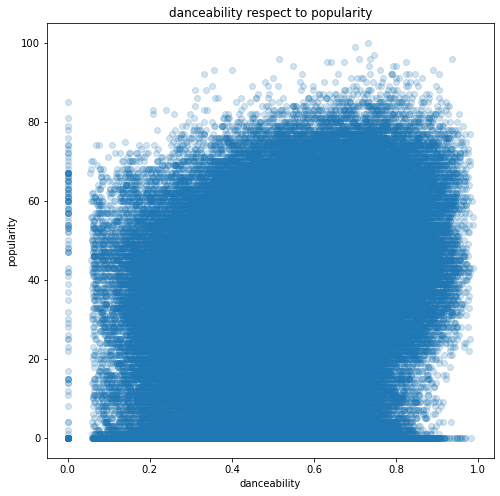

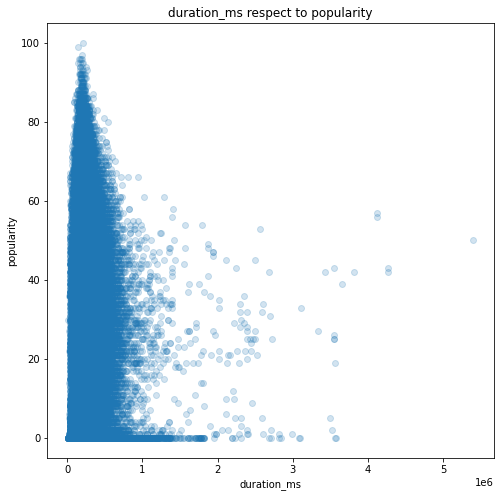

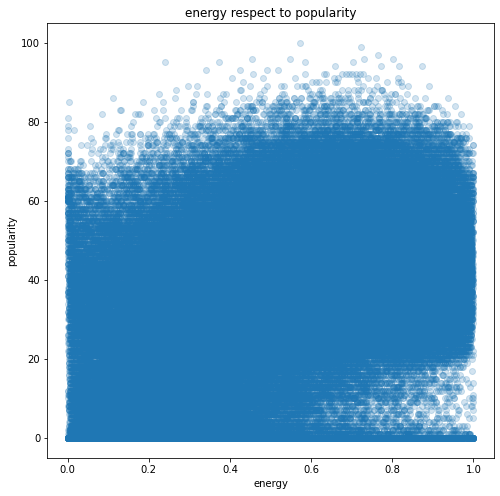

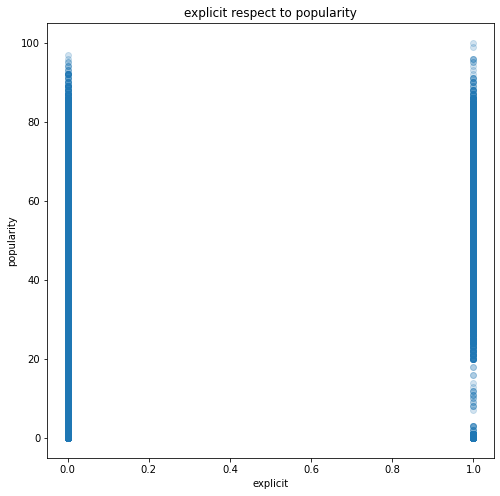

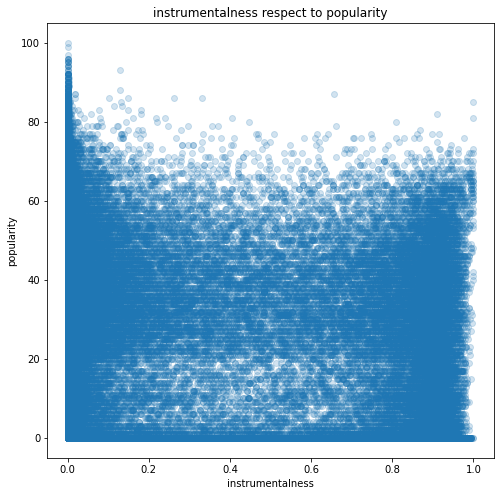

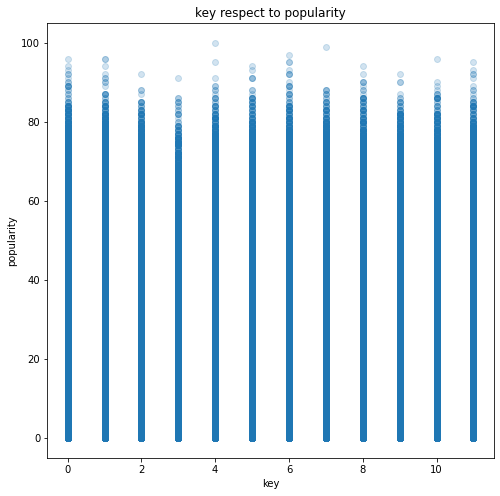

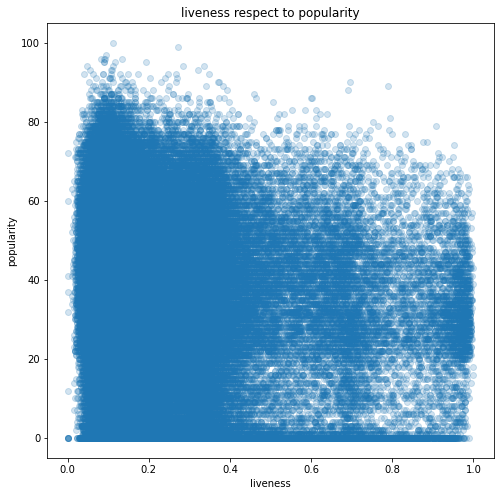

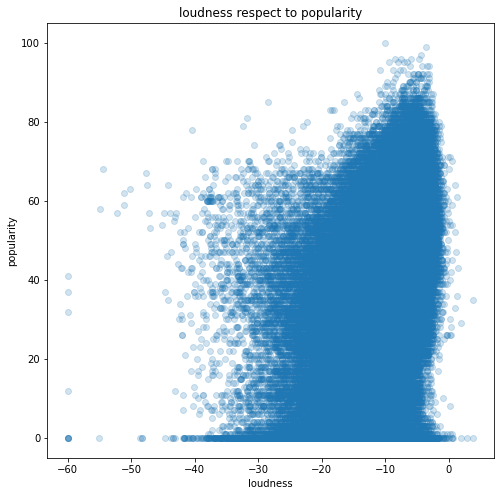

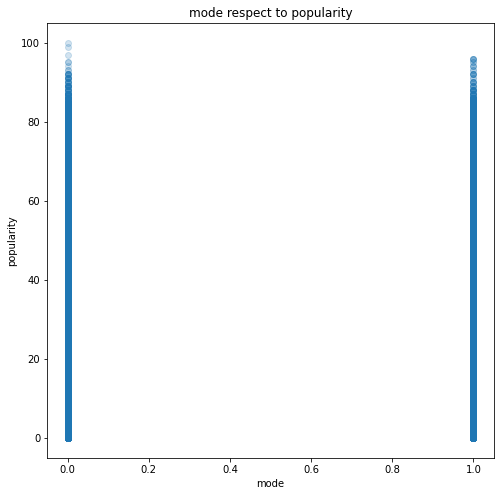

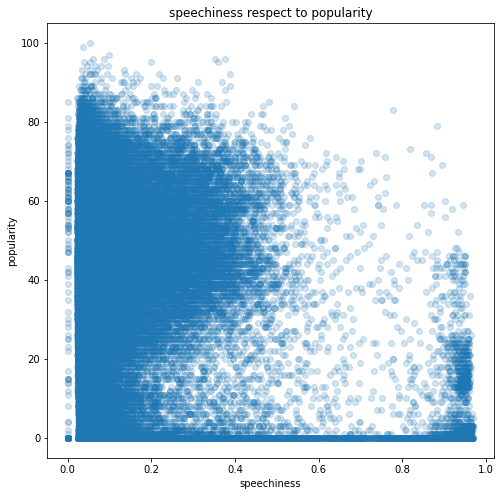

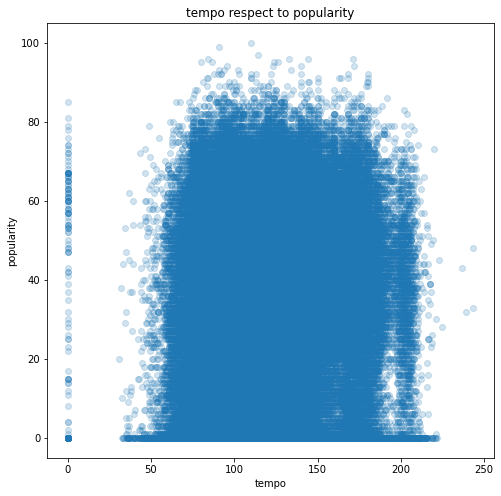

In [23]:
for col in df.drop(columns='popularity').columns:
    scatter_plot(df,col,'popularity')

<AxesSubplot:>

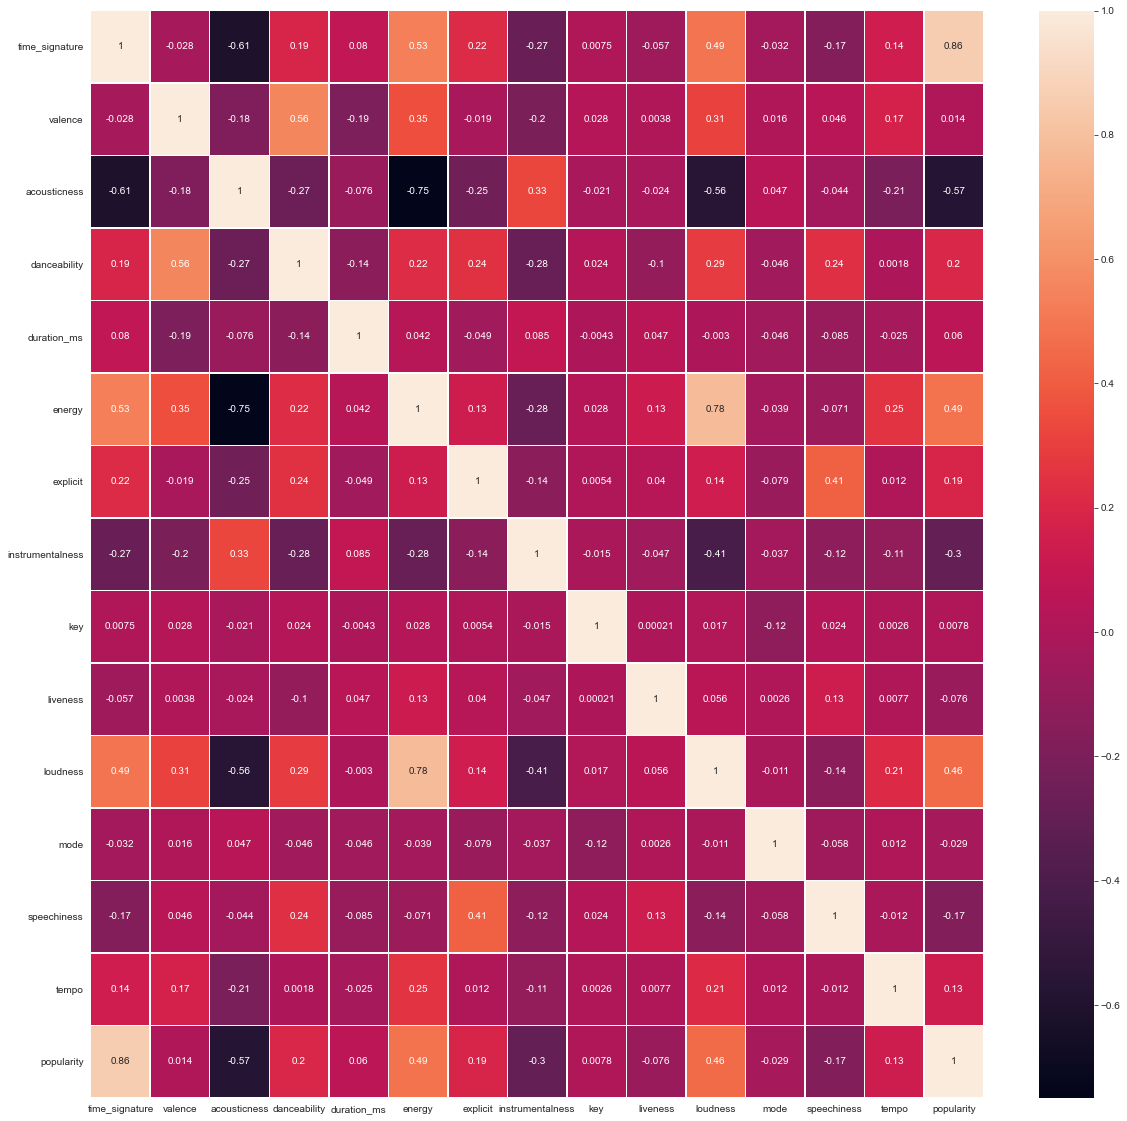

In [25]:
fig,ax = plt.subplots(figsize=(20,20))
custom_style = {
    'axes.axisbelow': True,
    'axes.edgecolor': 'white',
    'axes.facecolor': '#EAEAF2',
    'axes.grid': True,
    'axes.labelcolor': '.15',
    'axes.linewidth': 0,
    'font.family': 'Arial',
    'grid.color': 'white',
    'grid.linestyle': '-',
    'image.cmap': 'Greys',
    'legend.frameon': False,
    'legend.numpoints': 1,
    'legend.scatterpoints': 1,
    'lines.solid_capstyle': 'round',
    'pdf.fonttype': 42,
    'text.color': '.15',
    'xtick.color': '.15',
    'xtick.direction': 'out',
    'xtick.major.size': 0,
    'xtick.minor.size': 0,
    'ytick.color': '.15',
    'ytick.direction': 'out',
    'ytick.major.size': 0,
    'ytick.minor.size': 0
}
sns.set_style("darkgrid", rc=custom_style)
sns.heatmap(df.corr(),
           xticklabels=df.columns,
           yticklabels=df.columns,
           annot=True,
           linewidths=0.5,
           ax=ax)

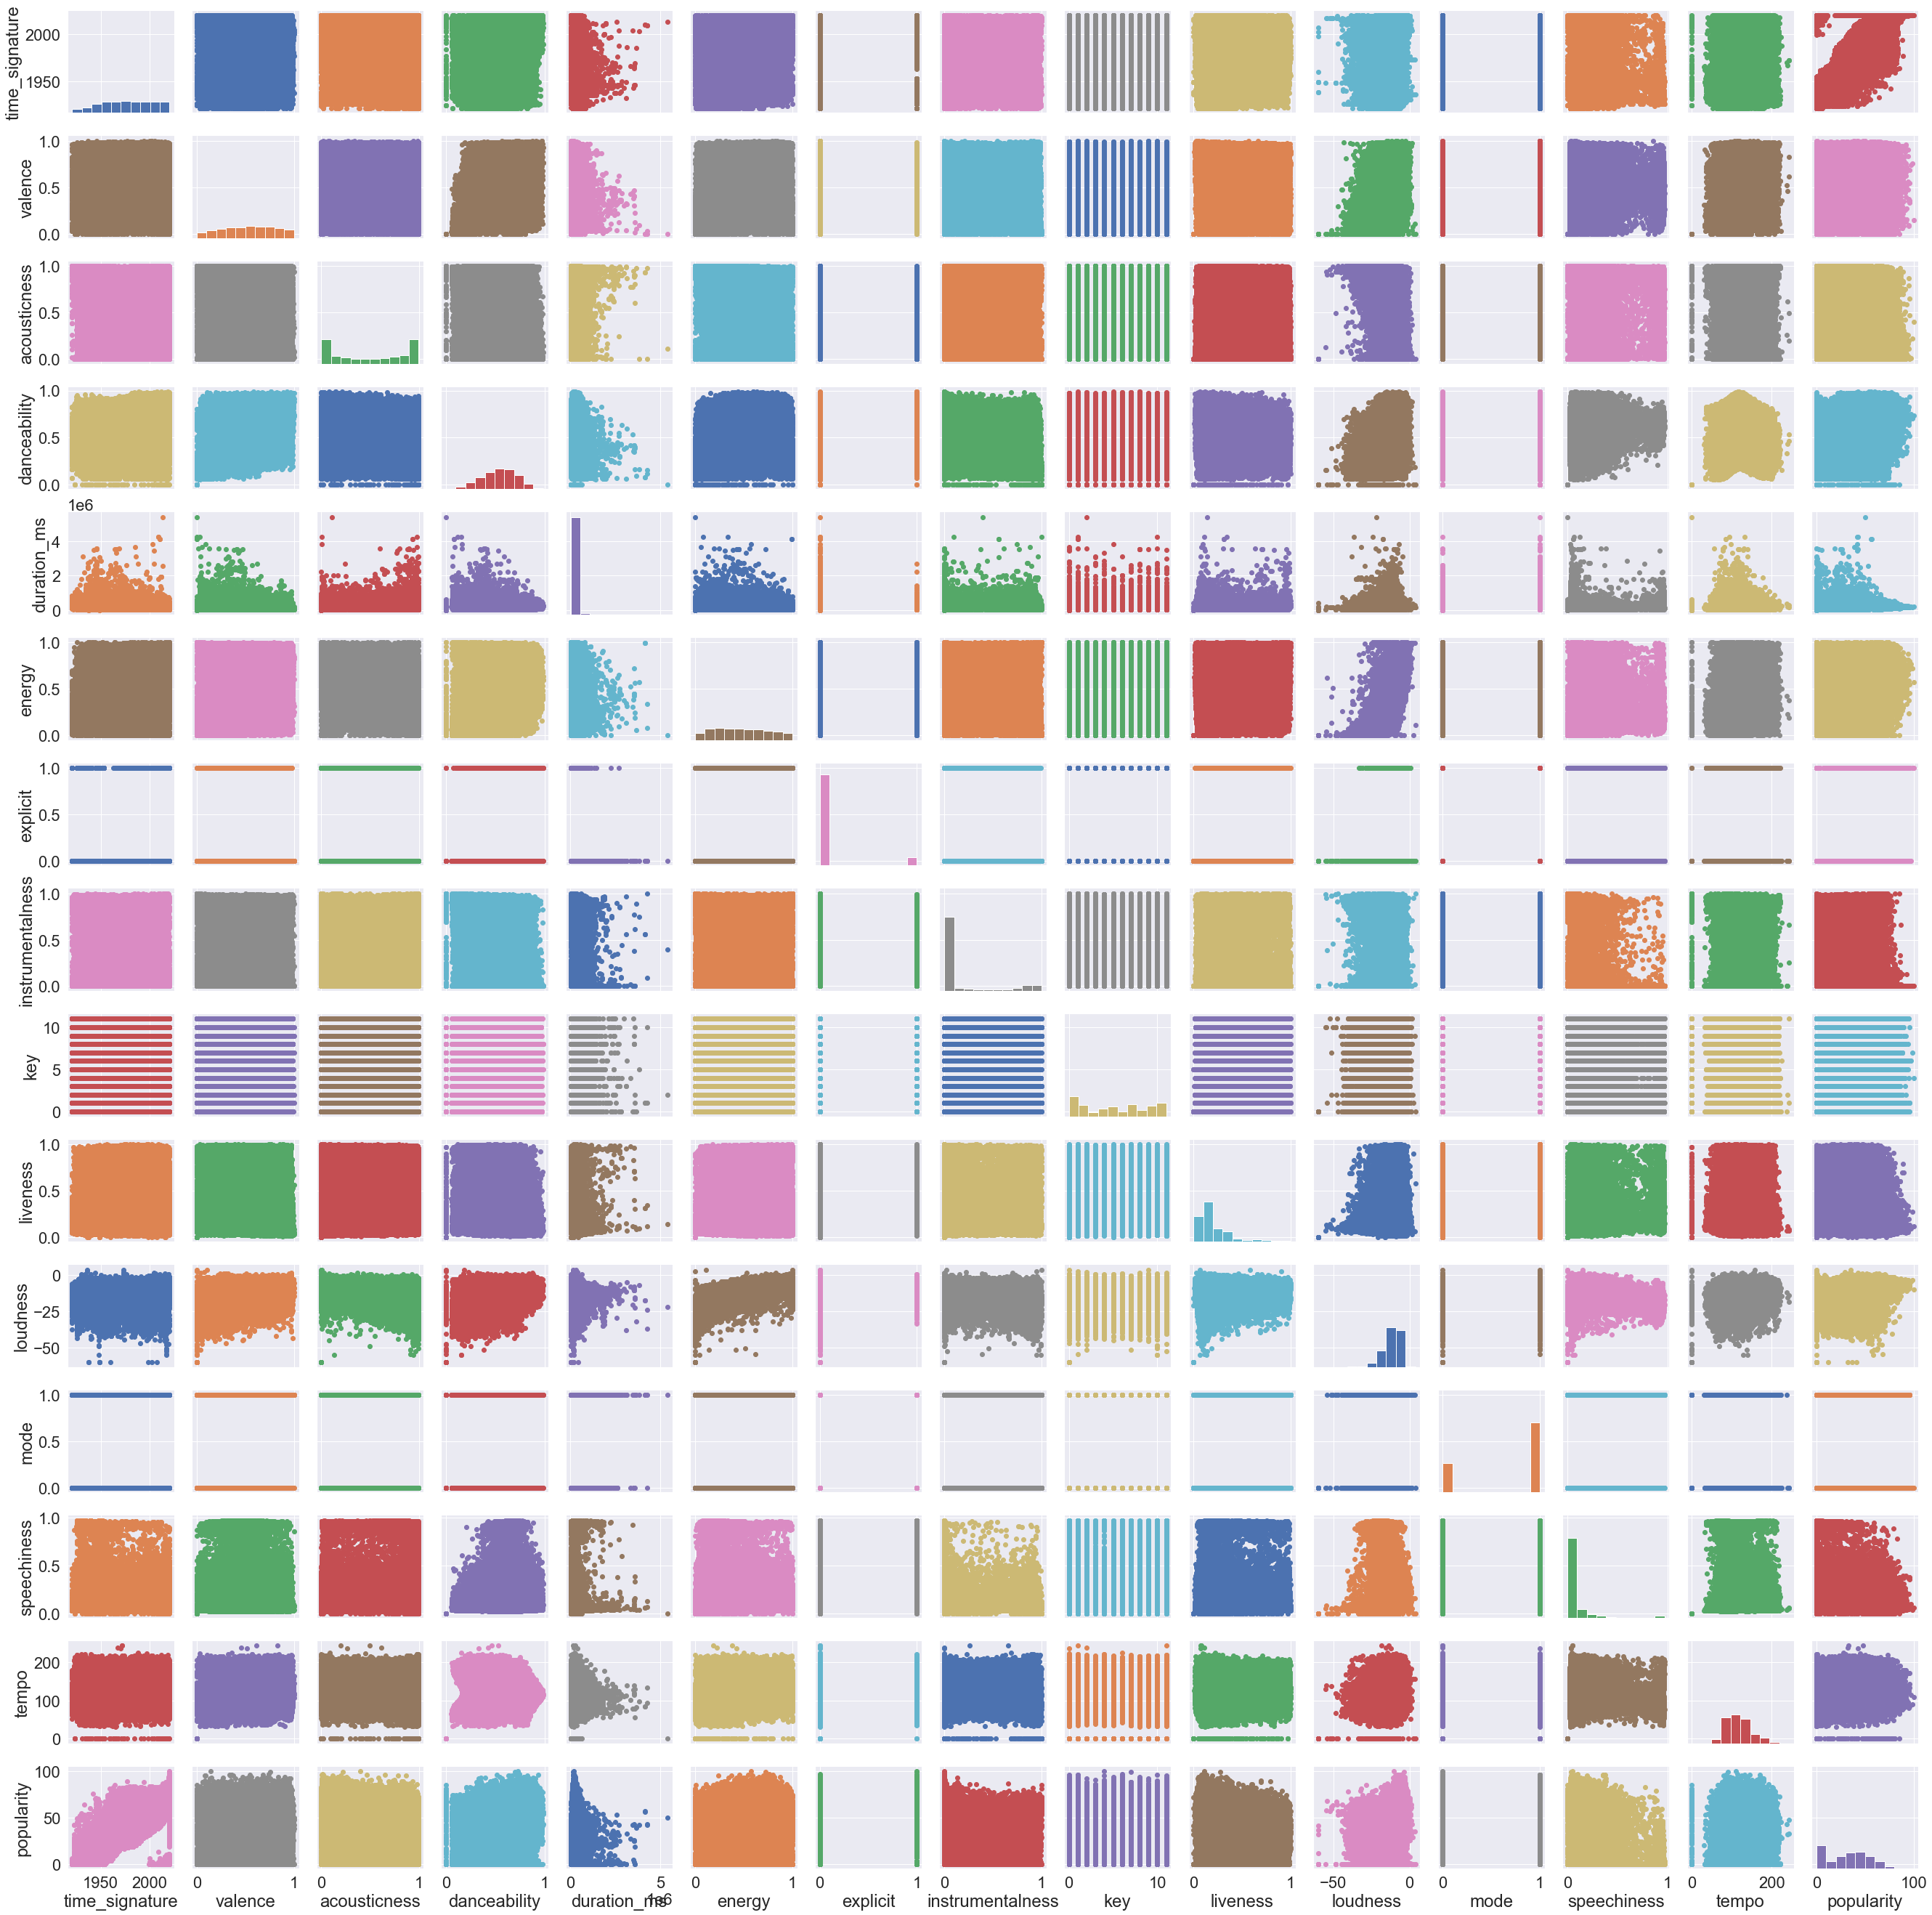

In [27]:
def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = next(colors)
    plt.hist(x, **kwargs)
    
colors = iter(sns.color_palette(n_colors=1000))
sns.set(font_scale=2)
g = sns.PairGrid(df)
g.map_diag(my_hist)
g.map_offdiag(my_scatter)

## Explore all feature labels that are not normalized first
- tempo
- explicit
- mode
- duration_ms
- loudness

In [ ]:
df_non_normal = df[['tempo','explicit','mode','duration_ms','loudness']]
df_binary_class = df[['explicit','mode']]
df_non_normal.head(10)

In [ ]:
df_binary_class.head(10)

## Find all inversingly correlated columns that explain the scale of feature label deviation

In [28]:
def calc_correlations(df, cutoff=0.5):
    corr = df.corr()
    corr_data = corr[(corr<1.0)&(corr < cutoff)]
    corr_list = df.corr().unstack().sort_values(kind="quicksort",ascending=False)
    return corr_list.where(corr_list < 1.0),corr_data

df_inv = df.drop(columns=['tempo','mode','explicit','duration_ms','loudness'])
corr_list,corr_data = calc_correlations(df_inv,cutoff=0)
corr_list = corr_list[np.isfinite(corr_list)].drop_duplicates()

In [29]:
corr_list.sort_values()

energy            acousticness       -0.749393
acousticness      time_signature     -0.614250
                  popularity         -0.573162
popularity        instrumentalness   -0.296750
energy            instrumentalness   -0.281101
instrumentalness  danceability       -0.278063
                  time_signature     -0.272371
acousticness      danceability       -0.266852
instrumentalness  valence            -0.198501
acousticness      valence            -0.184101
speechiness       popularity         -0.171979
time_signature    speechiness        -0.167816
instrumentalness  speechiness        -0.121700
danceability      liveness           -0.100193
liveness          popularity         -0.076464
speechiness       energy             -0.070555
time_signature    liveness           -0.057318
liveness          instrumentalness   -0.047193
speechiness       acousticness       -0.043980
valence           time_signature     -0.028245
acousticness      liveness           -0.024482
key          

The year time seems to outweigh and is the most relevant feature in our data

<AxesSubplot:>

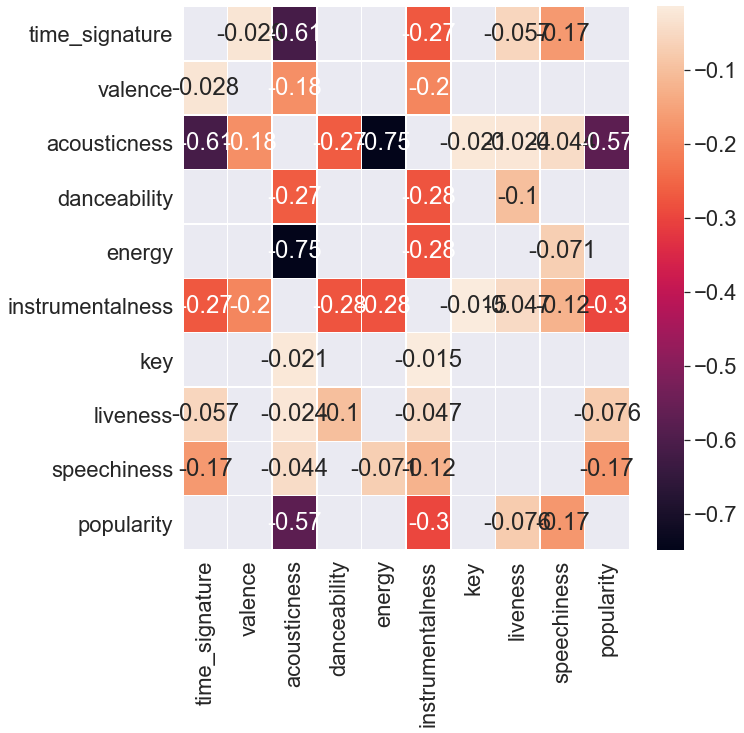

In [30]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_data,
           xticklabels=df_inv.columns,
           yticklabels=df_inv.columns,
           annot=True,
           linewidths=0.5,
           ax=ax)

#### Possible inversely correlated pairs are 
    - energy/acousticness,
    - instrumentalness/energy,
    - danceability/acousticness,
    - valence/instrumentalness,
    - speechiness/instrumentalness,
    - danceability/liveness
But contrary to contemporary perception, speechiness and instrumentaliness does not have that much of an inverse correlational relation. So is also is danceability and liveness as also for valence and instrumentalness

In [31]:
df_inv

,time_signature,valence,acousticness,danceability,energy,instrumentalness,key,liveness,speechiness,popularity
0,1921,0.0594,0.98200,0.279,0.211,0.878000,10,0.6650,0.0366,4
1,1921,0.9630,0.73200,0.819,0.341,0.000000,7,0.1600,0.4150,5
2,1921,0.0394,0.96100,0.328,0.166,0.913000,3,0.1010,0.0339,5
3,1921,0.1650,0.96700,0.275,0.309,0.000028,5,0.3810,0.0354,3
4,1921,0.2530,0.95700,0.418,0.193,0.000002,3,0.2290,0.0380,2
...,...,...,...,...,...,...,...,...,...,...
170648,2020,0.6080,0.08460,0.786,0.808,0.000289,7,0.0822,0.0881,72
170649,2020,0.7340,0.20600,0.717,0.753,0.000000,7,0.1010,0.0605,68
170650,2020,0.6370,0.10100,0.634,0.858,0.000009,4,0.2580,0.0809,76
170651,2020,0.1950,0.00998,0.671,0.623,0.000008,2,0.6430,0.3080,70


## Only do 2020

In [33]:
df.loc[df.time_signature == 2020,:].shape

(2030, 15)

In [34]:
df.loc[df.time_signature != 2020,:].shape

(168623, 15)

Only doing 2020 ommits 90% of given data and is biased as such 

In [36]:
df2020 = df_inv.loc[df.time_signature == 2020,:]
corr_list,corr_data = calc_correlations(df2020,cutoff=0)
corr_list = corr_list[np.isfinite(corr_list)].drop_duplicates()

In [37]:
df2020

,time_signature,valence,acousticness,danceability,energy,instrumentalness,key,liveness,speechiness,popularity
19606,2020,0.756,0.22100,0.700,0.722,0.000000,7,0.2720,0.0369,99
19607,2020,0.347,0.11400,0.823,0.586,0.000000,6,0.1930,0.2000,95
19608,2020,0.357,0.01940,0.935,0.454,0.000000,1,0.0824,0.3750,96
19609,2020,0.522,0.24400,0.761,0.518,0.000035,0,0.1070,0.1340,93
19610,2020,0.682,0.46800,0.737,0.802,0.000000,0,0.0931,0.0878,96
...,...,...,...,...,...,...,...,...,...,...
170648,2020,0.608,0.08460,0.786,0.808,0.000289,7,0.0822,0.0881,72
170649,2020,0.734,0.20600,0.717,0.753,0.000000,7,0.1010,0.0605,68
170650,2020,0.637,0.10100,0.634,0.858,0.000009,4,0.2580,0.0809,76
170651,2020,0.195,0.00998,0.671,0.623,0.000008,2,0.6430,0.3080,70


In [38]:
corr_list

energy            valence             0.380899
valence           danceability        0.328069
danceability      speechiness         0.276519
instrumentalness  acousticness        0.144414
liveness          energy              0.120537
valence           key                 0.100030
liveness          speechiness         0.096486
danceability      energy              0.090996
speechiness       valence             0.089096
energy            key                 0.041398
key               danceability        0.035241
instrumentalness  key                 0.014087
                  liveness            0.013530
speechiness       key                 0.005043
valence           liveness            0.001320
key               popularity          0.000094
popularity        acousticness       -0.002615
liveness          popularity         -0.003036
key               liveness           -0.003454
acousticness      key                -0.005613
popularity        speechiness        -0.007704
             

In [39]:
corr_data


,time_signature,valence,acousticness,danceability,energy,instrumentalness,key,liveness,speechiness,popularity
time_signature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,-0.089753,NaN,NaN,-0.108767,NaN,NaN,NaN,-0.091993
acousticness,NaN,-0.089753,NaN,-0.270032,-0.499978,NaN,-0.005613,-0.050373,-0.064226,-0.002615
danceability,NaN,NaN,-0.270032,NaN,NaN,-0.177132,NaN,-0.094101,NaN,-0.037274
energy,NaN,NaN,-0.499978,NaN,NaN,-0.071753,NaN,NaN,-0.040360,-0.104125
instrumentalness,NaN,-0.108767,NaN,-0.177132,-0.071753,NaN,NaN,NaN,-0.086711,-0.067177
key,NaN,NaN,-0.005613,NaN,NaN,NaN,NaN,-0.003454,NaN,NaN
liveness,NaN,NaN,-0.050373,-0.094101,NaN,NaN,-0.003454,NaN,NaN,-0.003036
speechiness,NaN,NaN,-0.064226,NaN,-0.040360,-0.086711,NaN,NaN,NaN,-0.007704
popularity,NaN,-0.091993,-0.002615,-0.037274,-0.104125,-0.067177,NaN,-0.003036,-0.007704,NaN


<AxesSubplot:>

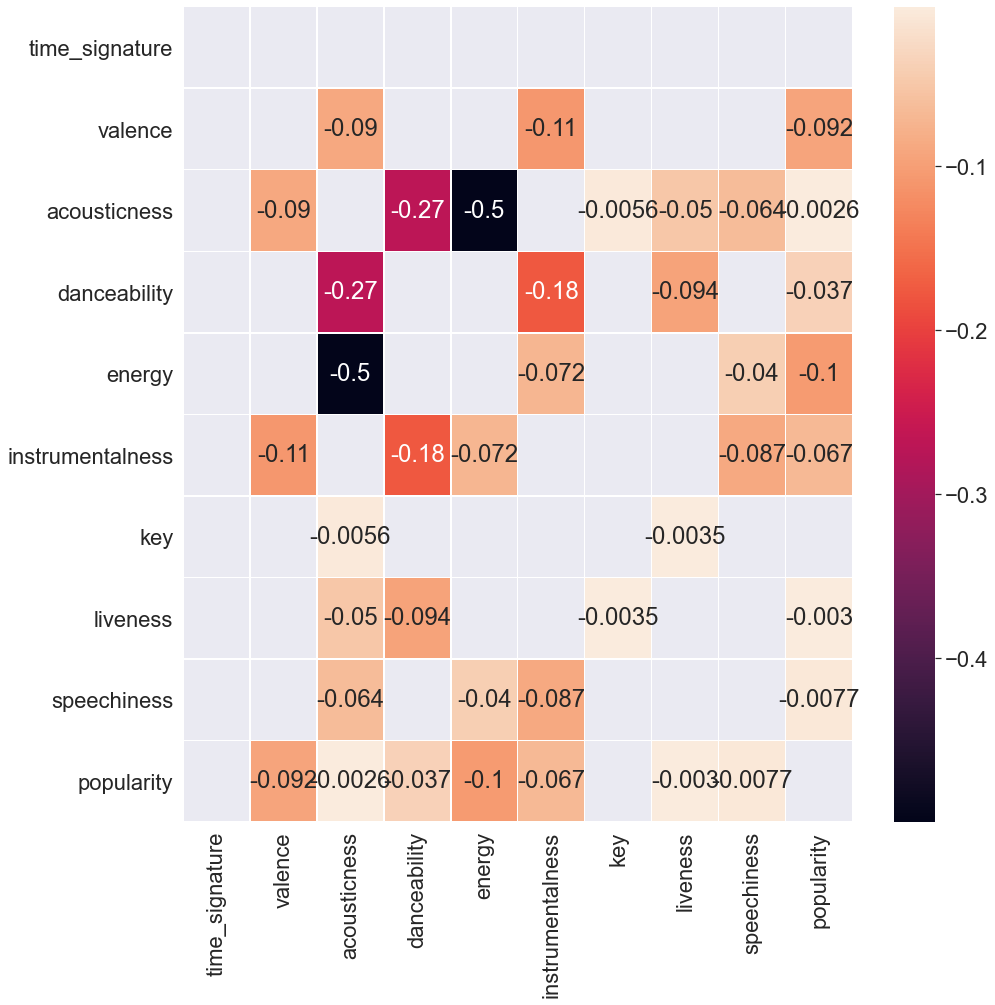

In [40]:
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_data,
           xticklabels=df_inv.columns,
           yticklabels=df_inv.columns,
           annot=True,
           linewidths=0.5,
           ax=ax)

also limiting the data to only from 2020 to see if there is a better inversely correlated pair relationship as feature vectors is also largely insignificant.

## heuristic of correlated pairs and then weight them by difference to popularity 